# Capstone Project: Week 2

## Section 1: Introduction

### Background

According to the National Highway Traffic Safety Administration (NHTSA), Over 36,000 people were killed in traffic accidents in 2018 in the United States. Of those deaths, 6,283 were pedestirans and 857 were bicyclists. As these numbers trend upwards, serious concerns arise from the statistics.

###  The Problem

Many car accidents can be avoided if sufficient warning is provided in advance. With historical collision data from Seattle Department of Transportation, we can predict the probability of getting into a car accident and provide actionable information to drivers and improve overall safety for the public.

## Section 2: The Data

For this case study, we will use accident data from Seattle's Department of Transportation from 2004 to the present. This includes all types of collisions recorded by traffic records which is updated on an a weekly basis. 

This dataset contains 38 attributes such as location, collision type, injuries, weather, road conditions, light conditions, speeding, vehicle count, pedestrian count, and severity code. We will condition the data and prepare it for a number of analytical models.

This data will ultimately determine the probability of getting into an vehicle accident as well as determine the severity based on the circumstances.

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [17]:
df = pd.read_csv("collisions.csv", low_memory=False)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Variable Exploration

In [18]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [19]:
df.WEATHER.unique()

array(['Overcast', 'Raining', 'Clear', nan, 'Unknown', 'Other', 'Snowing',
       'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt',
       'Severe Crosswind', 'Partly Cloudy'], dtype=object)

Text(0, 0.5, 'Number of Accidents')

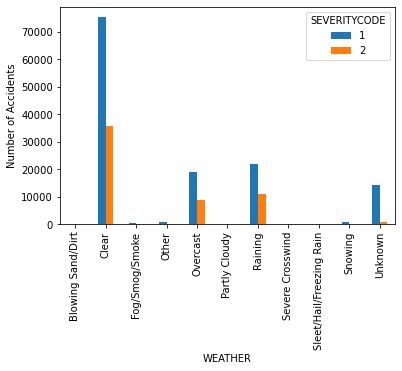

In [20]:
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)
pd.crosstab(df['WEATHER'], df['SEVERITYCODE']).plot.bar()
plt.ylabel('Number of Accidents')

Text(0, 0.5, 'Number of Accidents')

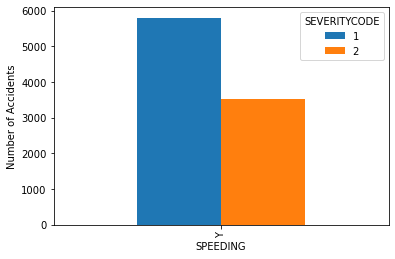

In [21]:
df.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize=True)
pd.crosstab(df['SPEEDING'], df['SEVERITYCODE']).plot.bar()
plt.ylabel('Number of Accidents')

Text(0, 0.5, 'Number of Accidents')

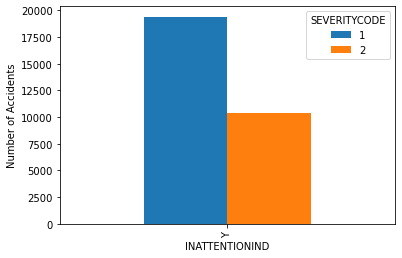

In [22]:
df.groupby(['INATTENTIONIND'])['SEVERITYCODE'].value_counts(normalize=True)
pd.crosstab(df['INATTENTIONIND'], df['SEVERITYCODE']).plot.bar()
plt.ylabel('Number of Accidents')

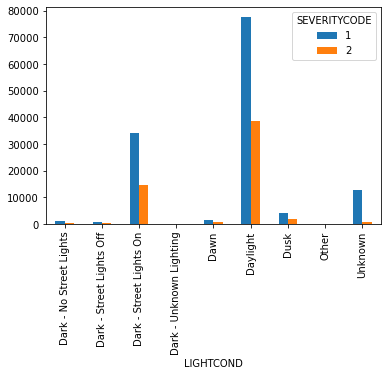

In [23]:
df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)
pd.crosstab(df['LIGHTCOND'], df['SEVERITYCODE']).plot.bar()

Text(0, 0.5, 'Number of Accidents')

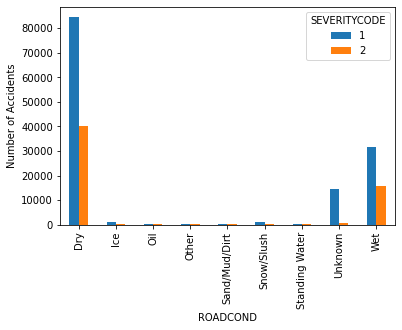

In [24]:
df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)
pd.crosstab(df['ROADCOND'], df['SEVERITYCODE']).plot.bar()
plt.ylabel('Number of Accidents')

## Pre-processing

 ### Feature Selection

We want to predict the severity of accident based on environmental and driver elements; therefore, our target variable is "severity" and our indepdendent variables are - weather,road conditions, light conditions, speeding, and inattention.

With our new machine learning model, we will be able to predict the severity of an accident based on the environmental conditions.

In [25]:
df1 = pd.DataFrame()
df1 = df1.assign(weather=df['WEATHER'], roadcond=df['ROADCOND'], lightcond=df['LIGHTCOND'], 
                speeding=df['SPEEDING'], inattention=df['INATTENTIONIND'])
df1.head()

,weather,roadcond,lightcond,speeding,inattention
0,Overcast,Wet,Daylight,NaN,NaN
1,Raining,Wet,Dark - Street Lights On,NaN,NaN
2,Overcast,Dry,Daylight,NaN,NaN
3,Clear,Dry,Daylight,NaN,NaN
4,Raining,Wet,Daylight,NaN,NaN


### Cleaning variables

In [26]:
df1.fillna(0, inplace=True) # converts all N/A to 0
df1.replace(to_replace='Y',value=1, inplace=True)

In [27]:
df1.dtypes

weather        object
roadcond       object
lightcond      object
speeding        int64
inattention     int64
dtype: object

Use the one hot encoding technique from scikitlearn to convert object datatypes to dummy variables for computation.

In [28]:
feature = df1[['speeding', 'inattention']]
feature = pd.concat([feature, pd.get_dummies(df['WEATHER'])], axis=1)
feature = pd.concat([feature, pd.get_dummies(df['ROADCOND'])], axis=1)
feature = pd.concat([feature, pd.get_dummies(df['LIGHTCOND'])], axis=1)

In [29]:
feature.columns
feature.drop(columns=['Other', 'Unknown', 'Other', 'Unknown', 'Other', 'Unknown'], inplace=True)
feature

,speeding,inattention,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
194669,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
194670,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
194671,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
# Target Variable
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

## Classification: Logistic Regression

In [41]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, y, test_size=0.20, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 25) (155738,)
Test set: (38935, 25) (38935,)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(penalty='l1',C=0.000000001, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=1e-09, penalty='l1', solver='liblinear')

In [44]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       ...,
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])

## Model Evaluation

### Jaccard Score

In [46]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.701476820341595

### Confusion Matrix

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[    0 11623]
 [    0 27312]]


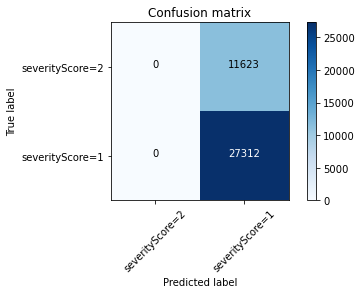

In [48]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severityScore=2','severityScore=1'],normalize= False,  title='Confusion matrix')

In [49]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82     27312
           2       0.00      0.00      0.00     11623

    accuracy                           0.70     38935
   macro avg       0.35      0.50      0.41     38935
weighted avg       0.49      0.70      0.58     38935



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Log Loss Evaluation

In [50]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6931471805599453